In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv(r'C:\Users\ASUS\Desktop\new\netflix_titles.csv')


In [ ]:
df['release_year'].dtype


dtype('int64')

In [ ]:
c=0
for year in df.release_year.unique():
    if pd.isna(year):
        c+=1

print(f"Number of NaN values in release_year: {c}")


Number of NaN values in release_year: 0


In [97]:
dummies=pd.get_dummies(df['type'], dtype=int)
df=df.merge(dummies, left_index=True, right_index=True)


In [ ]:
df.drop(columns=['director', 'cast', 'description','title','date_added','duration','rating','type'], inplace=True)


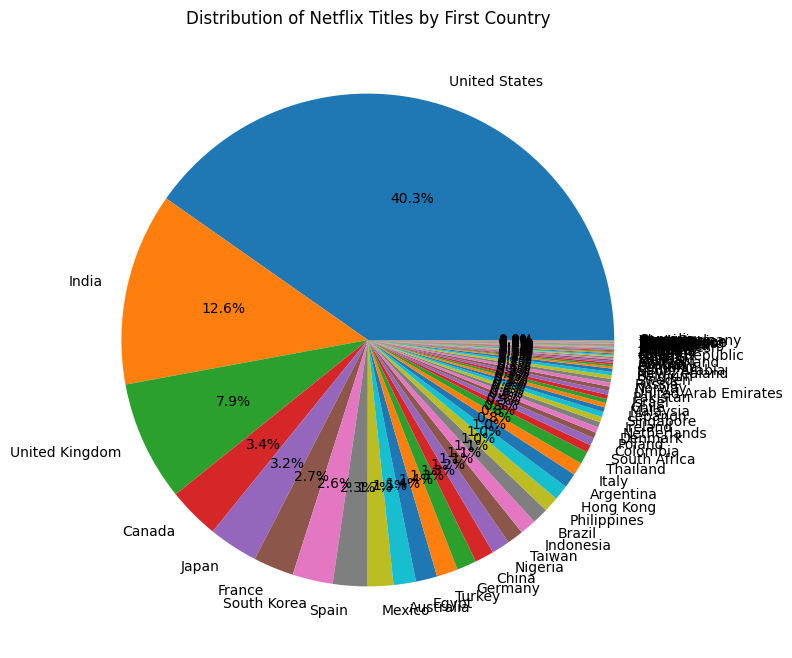

In [ ]:
df_country = df['country'].str.split(',', expand=True)
country_split_counts = df_country[0].value_counts(dropna=True)
plt.figure(figsize=(8, 8))
plt.pie(country_split_counts, labels=country_split_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Netflix Titles by First Country')
plt.show()


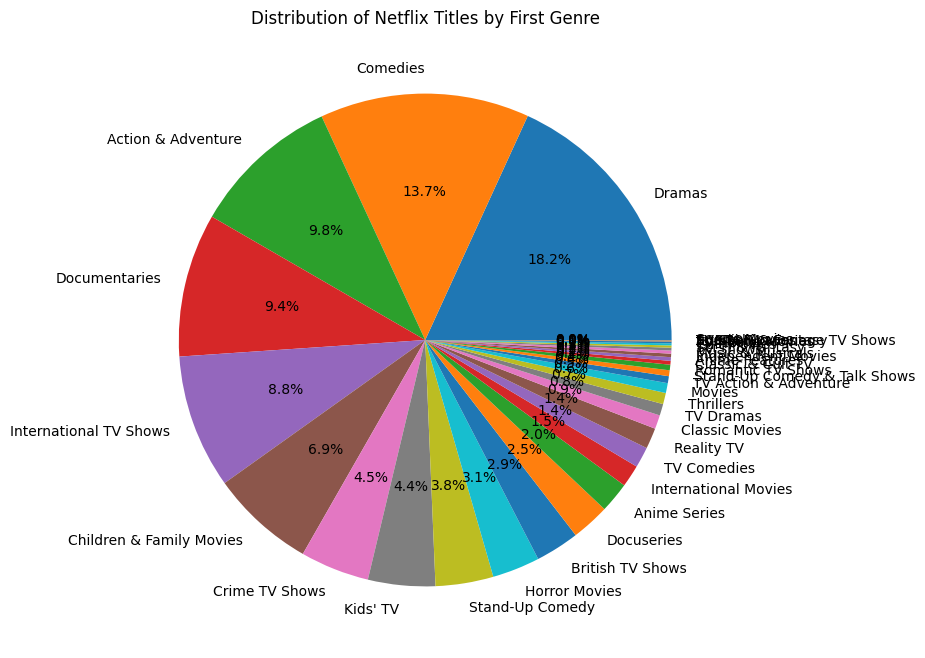

In [ ]:
listed_in_split = df['listed_in'].str.split(',', expand=True)
listed_in_split_counts = listed_in_split[0].value_counts(dropna=True)
plt.figure(figsize=(8, 8))
plt.pie(listed_in_split_counts, labels=listed_in_split_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Netflix Titles by First Genre')
plt.show()


In [ ]:
df.sample(10)


,show_id,country,release_year,listed_in,Movie,TV Show
5181,s5182,United States,2016,Dramas,1,0
7837,s7838,India,2011,"Comedies, International Movies, Romantic Movies",1,0
177,s178,"United Kingdom, United States",1961,"Action & Adventure, Classic Movies",1,0
5574,s5575,India,2001,"Action & Adventure, Comedies, Dramas",1,0
2571,s2572,United States,2013,Stand-Up Comedy,1,0
1502,s1503,United States,2020,Stand-Up Comedy,1,0
3125,s3126,"United Kingdom, United States, Germany, Denmar...",2015,"Dramas, Independent Movies, International Movies",1,0
7403,s7404,"Canada, United States",2016,Action & Adventure,1,0
8193,s8194,Singapore,2014,"International TV Shows, Reality TV",0,1
8161,s8162,India,2010,"Comedies, International Movies, Music & Musicals",1,0


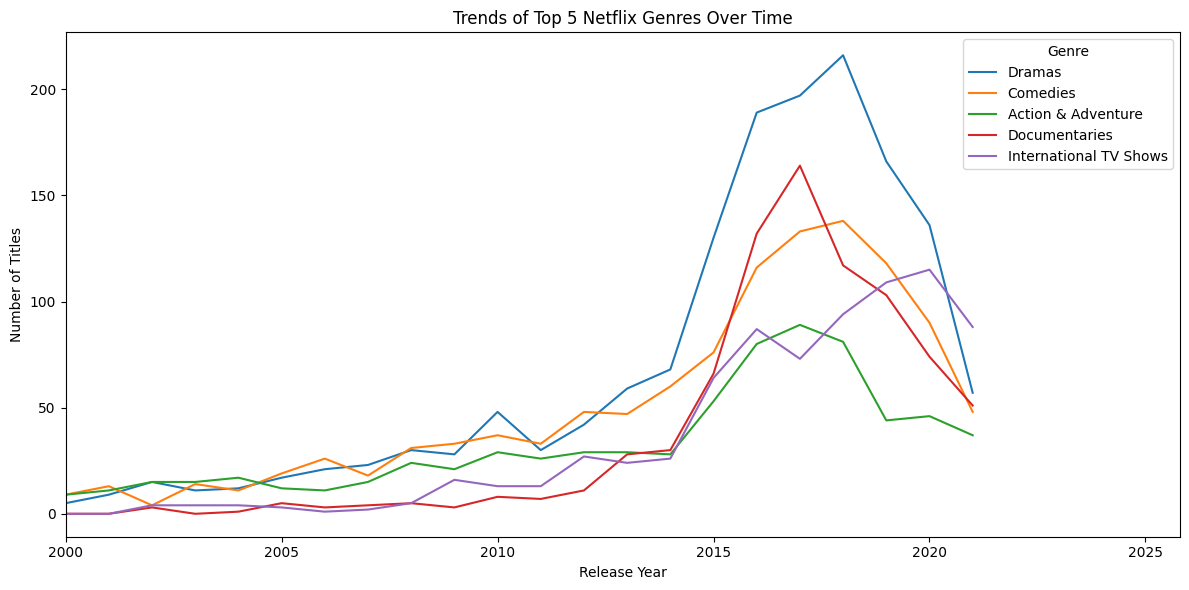

In [ ]:
# Count the number of titles per genre (first genre only) per year
genre_year_counts = df.groupby(['release_year', listed_in_split[0]])['show_id'].count().unstack(fill_value=0)

# Select top 5 genres overall for clarity
top_genres = listed_in_split[0].value_counts().head(5).index
genre_year_counts_top = genre_year_counts[top_genres]

# Plot the trends
plt.figure(figsize=(12, 6))
genre_year_counts_top.plot(ax=plt.gca())
plt.title('Trends of Top 5 Netflix Genres Over Time')
plt.xlim(left=2000)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()


In [103]:
import os
output_path = os.path.expanduser(f"~/netflix.xlsx")
df.to_excel(output_path, index=False)
print(f"File saved to {output_path}")


File saved to C:\Users\ASUS/netflix.xlsx
